In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import string
import re

In [276]:
file_path = '/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/newest_EO.csv'
data = pd.read_csv(file_path)

data['publication_date'] = pd.to_datetime(data['publication_date'])
data['signing_date'] = pd.to_datetime(data['signing_date'])
data['president'] = data['president'].apply(lambda x: eval(x).get('name') if isinstance(x, str) else x)
data['executive_order_number'] = data['executive_order_number'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

def clean_toc_subject(entry):
    if pd.isnull(entry):
        return "Unspecified"
    cleaned = entry.replace(":", "").strip()
    cleaned = re.sub(r"(\w+), Department of", r"Department of \1", cleaned)
    cleaned = cleaned.split(",")[0] if "," in cleaned else cleaned
    return cleaned

data['toc_subject'] = data['toc_subject'].apply(clean_toc_subject)
data.head()

,title,president,publication_date,signing_date,citation,document_number,executive_order_number,pdf_url,toc_subject,disposition_notes,cleaned_text
0,Combating Emerging Firearms Threats and Improv...,Joseph R. Biden Jr.,2024-10-02,2024-09-26,89 FR 80345,2024-22938,14127,https://www.govinfo.gov/content/pkg/FR-2024-10...,Unspecified,NaN,Executive Order 14127--Combating Emerging Fire...
1,Investing in America and Investing in American...,Joseph R. Biden Jr.,2024-09-11,2024-09-06,89 FR 73559,2024-20712,14126,https://www.govinfo.gov/content/pkg/FR-2024-09...,Federal Government,"See: EO 11246, September 24, 1965; EO 13985, J...","Executive Order 14126 of September 6, 2024 ..."
2,Establishing an Emergency Board To Investigate...,Joseph R. Biden Jr.,2024-07-29,2024-07-24,89 FR 60791,2024-16740,14125,https://www.govinfo.gov/content/pkg/FR-2024-07...,Committees; Establishment,NaN,"Executive Order 14125 of July 24, 2024 ..."
3,White House Initiative on Advancing Educationa...,Joseph R. Biden Jr.,2024-07-22,2024-07-17,89 FR 59585,2024-16225,14124,https://www.govinfo.gov/content/pkg/FR-2024-07...,Education,"See: EO 14045, September 13, 2021",Executive Order 14124--White House Initiative ...
4,White House Council on Supply Chain Resilience,Joseph R. Biden Jr.,2024-06-21,2024-06-14,89 FR 51949,2024-13810,14123,https://www.govinfo.gov/content/pkg/FR-2024-06...,Committees; Establishment,"See: EO 14017, February 24, 2021\r\nSupersedes...","Executive Order 14123 of June 14, 2024 ..."


In [277]:
recent_10_years_data = data[(data['publication_date'] >= '2014-01-01') & (data['signing_date'] >= '2014-01-01')]
recent_10_years_data.head()

,title,president,publication_date,signing_date,citation,document_number,executive_order_number,pdf_url,toc_subject,disposition_notes,cleaned_text
0,Combating Emerging Firearms Threats and Improv...,Joseph R. Biden Jr.,2024-10-02,2024-09-26,89 FR 80345,2024-22938,14127,https://www.govinfo.gov/content/pkg/FR-2024-10...,Unspecified,NaN,Executive Order 14127--Combating Emerging Fire...
1,Investing in America and Investing in American...,Joseph R. Biden Jr.,2024-09-11,2024-09-06,89 FR 73559,2024-20712,14126,https://www.govinfo.gov/content/pkg/FR-2024-09...,Federal Government,"See: EO 11246, September 24, 1965; EO 13985, J...","Executive Order 14126 of September 6, 2024 ..."
2,Establishing an Emergency Board To Investigate...,Joseph R. Biden Jr.,2024-07-29,2024-07-24,89 FR 60791,2024-16740,14125,https://www.govinfo.gov/content/pkg/FR-2024-07...,Committees; Establishment,NaN,"Executive Order 14125 of July 24, 2024 ..."
3,White House Initiative on Advancing Educationa...,Joseph R. Biden Jr.,2024-07-22,2024-07-17,89 FR 59585,2024-16225,14124,https://www.govinfo.gov/content/pkg/FR-2024-07...,Education,"See: EO 14045, September 13, 2021",Executive Order 14124--White House Initiative ...
4,White House Council on Supply Chain Resilience,Joseph R. Biden Jr.,2024-06-21,2024-06-14,89 FR 51949,2024-13810,14123,https://www.govinfo.gov/content/pkg/FR-2024-06...,Committees; Establishment,"See: EO 14017, February 24, 2021\r\nSupersedes...","Executive Order 14123 of June 14, 2024 ..."


### Visualziations

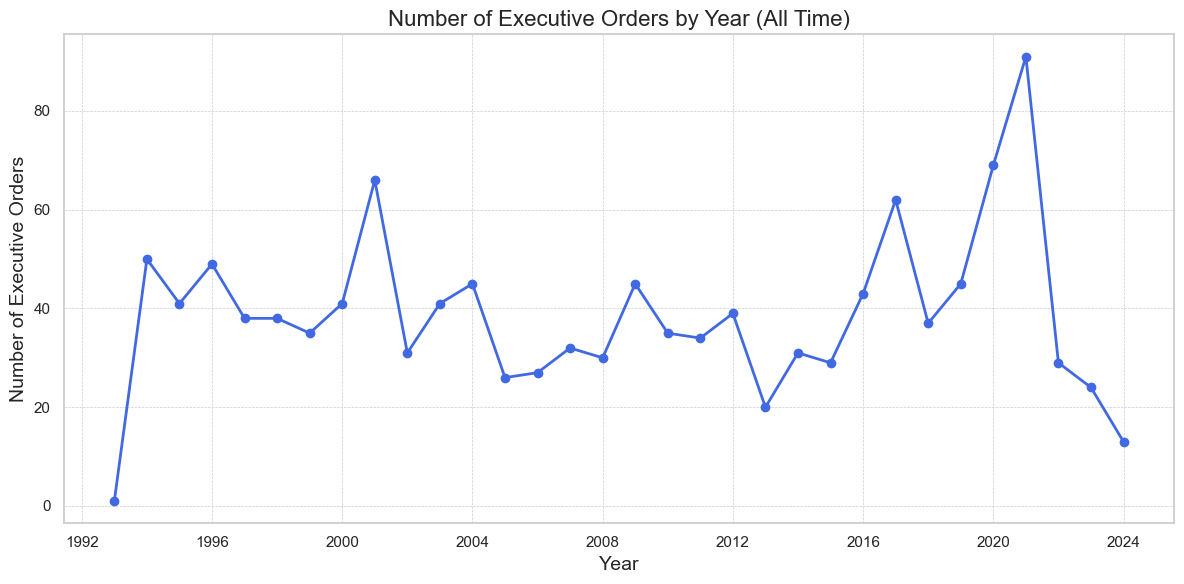

In [278]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts, marker='o', linestyle='-', color='royalblue', linewidth=2)
plt.title('Number of Executive Orders by Year (All Time)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Executive Orders', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

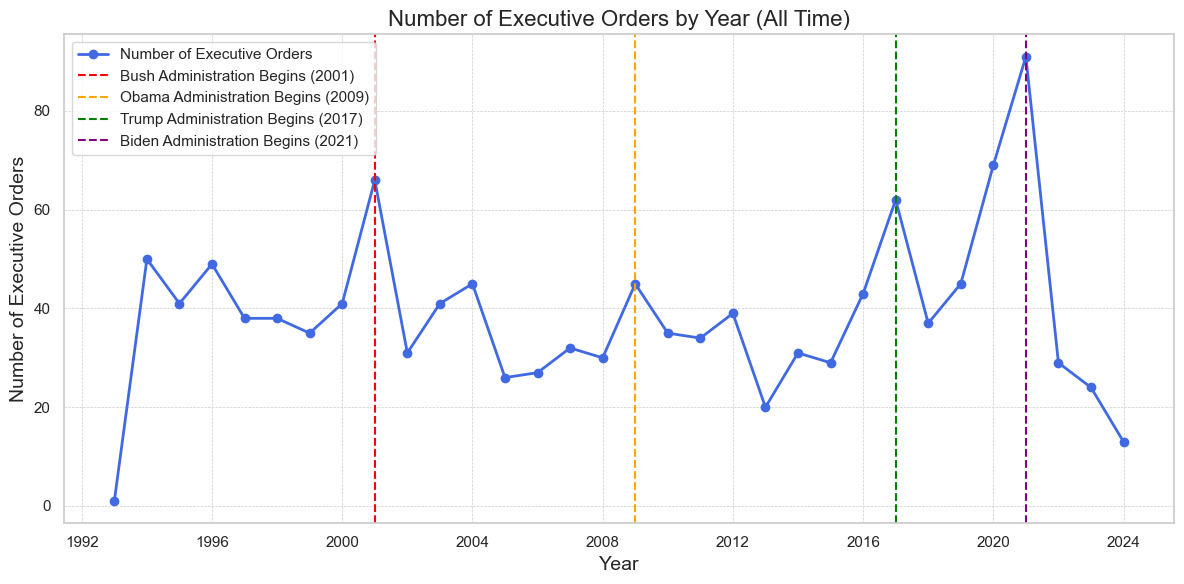

In [279]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='royalblue', linewidth=2, label='Number of Executive Orders')

plt.axvline(x=2001, color='red', linestyle='--', label='Bush Administration Begins (2001)')
plt.axvline(x=2009, color='orange', linestyle='--', label='Obama Administration Begins (2009)')
plt.axvline(x=2017, color='green', linestyle='--', label='Trump Administration Begins (2017)')
plt.axvline(x=2021, color='purple', linestyle='--', label='Biden Administration Begins (2021)')

plt.title('Number of Executive Orders by Year (All Time)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Executive Orders', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

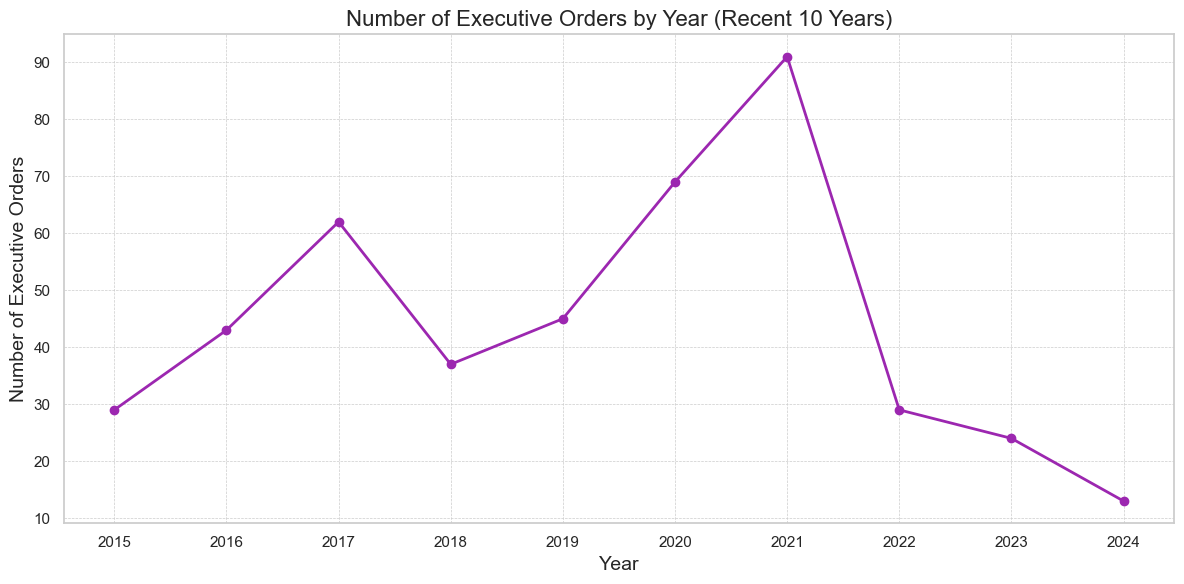

In [280]:
sns.set(style="whitegrid")

purple = "#9C27B0"

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts_recent.index, yearly_counts_recent.values, marker='o', linestyle='-', color=purple, linewidth=2)
plt.title('Number of Executive Orders by Year (Recent 10 Years)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Executive Orders', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

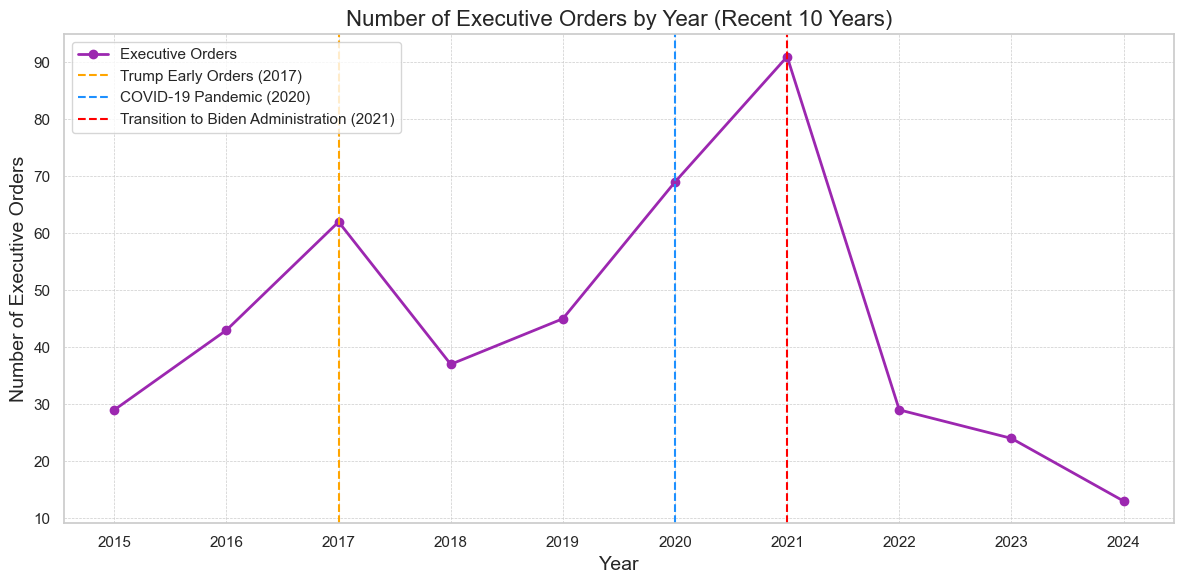

In [281]:
sns.set(style="whitegrid")

plot_color = "#9C27B0"
trump_color = "orange"
covid_color = "dodgerblue"
biden_color = "red"

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts_recent.index, yearly_counts_recent.values, marker='o', linestyle='-', color=plot_color, linewidth=2, label='Executive Orders')

# Adding annotations for key events in the recent 10 years
plt.axvline(x=2017, color=trump_color, linestyle='--', label='Trump Early Orders (2017)')
plt.axvline(x=2020, color=covid_color, linestyle='--', label='COVID-19 Pandemic (2020)')
plt.axvline(x=2021, color=biden_color, linestyle='--', label='Transition to Biden Administration (2021)')

plt.title('Number of Executive Orders by Year (Recent 10 Years)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Executive Orders', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [282]:
def preprocess(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

recent_10_years_data['cleaned_text'] = recent_10_years_data['cleaned_text'].apply(preprocess)

# Count Vectorization
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(recent_10_years_data['cleaned_text'])

# LDA Topic Modeling
n_topics = 6
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, learning_decay=0.7, random_state=42)
lda.fit(X)

# Assign Topics to Each Document
topic_labels = lda.transform(X).argmax(axis=1)

topic_names = {
    0: 'Cybersecurity',
    1: 'Artificial Intelligence',
    2: 'Technology',
    3: 'Software',
    4: 'Public Health',
    5: 'Economic Policy'
}

recent_10_years_data['category'] = [topic_names[label] for label in topic_labels]

# Display Texts in Each Topic
for topic_id, topic_name in topic_names.items():
    print(f"\n--- Texts in Topic ({topic_name}) ---")
    topic_texts = recent_10_years_data[recent_10_years_data['category'] == topic_name]['cleaned_text'].head(5)
    for idx, text in enumerate(topic_texts, 1):
        print(f"\nText {idx}:\n{text[:500]}...")

# Grouping by Year and Topic
recent_10_years_data['year'] = pd.to_datetime(recent_10_years_data['signing_date']).dt.year
topic_by_year = recent_10_years_data.groupby(['year', 'category']).size().unstack(fill_value=0)

/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/1628012550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['cleaned_text'] = recent_10_years_data['cleaned_text'].apply(preprocess)



--- Texts in Topic (Cybersecurity) ---

Text 1:
executive order 14124white house initiative on advancing educational  equity excellence and economic opportunity through hispanicserving  institutions ...

Text 2:
executive order 14121 of march 27 2024                   recognizing and honoring womens history                  by the authority vested in me as president by the                  constitution and the laws of the united states of                  america it is hereby ordered as follows                  section 1 policy women and girls of all backgrounds                  have shaped our countrys history from the ongoing                  fight for justice and equality to cuttingedge              ...

Text 3:
executive order 14120 of march 18 2024                   advancing womens health research and innovation                  by the authority vested in me as president by the                  constitution and the laws of the united states of                  america it is here

/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/1628012550.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['category'] = [topic_names[label] for label in topic_labels]
/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/1628012550.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['year'] = pd.to_datetime(recent_10_years_data['signing_date']).dt.year


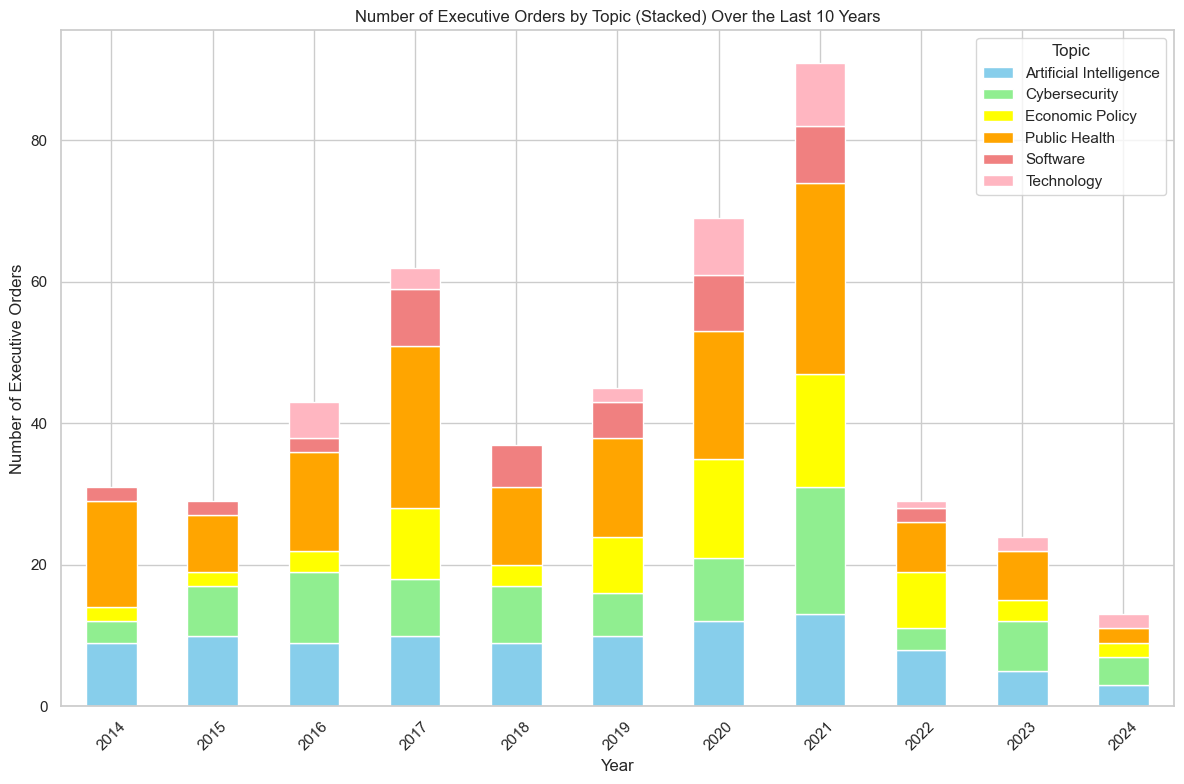

In [283]:
# Generate the Stacked Bar Plot
colors = ['skyblue', 'lightgreen', 'yellow', 'orange', 'lightcoral', 'lightpink']
topic_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Number of Executive Orders by Topic (Stacked) Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.xticks(rotation=45)
plt.legend(title='Topic')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

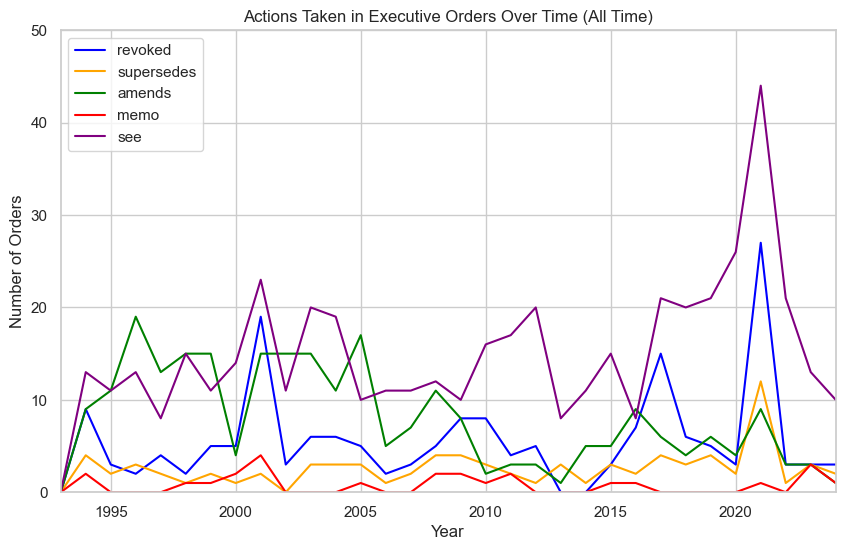

In [ ]:
# Create columns based on keywords in 'disposition_notes'
data['revoked'] = data['disposition_notes'].str.contains('Revokes', case=False, na=False).astype(int)
data['supersedes'] = data['disposition_notes'].str.contains('Supersedes', case=False, na=False).astype(int)
data['amends'] = data['disposition_notes'].str.contains('Amends', case=False, na=False).astype(int)
data['memo'] = data['disposition_notes'].str.contains('Memo', case=False, na=False).astype(int)
data['see'] = data['disposition_notes'].str.contains('See', case=False, na=False).astype(int)

plt.figure(figsize=(10, 6))

colors = ['blue', 'orange', 'green', 'red', 'purple']

data_resampled = data.set_index('signing_date').resample('Y')[['revoked', 'supersedes', 'amends', 'memo', 'see']].sum()
data_resampled.plot(color=colors, figsize=(10, 6))

plt.ylim(0, 50)

plt.title("Actions Taken in Executive Orders Over Time (All Time)")
plt.ylabel("Number of Orders")
plt.xlabel("Year")
plt.grid(True)

plt.show()

/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/4279588772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['revoked'] = recent_10_years_data['disposition_notes'].str.contains('Revokes', case=False, na=False).astype(int)
/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/4279588772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['supersedes'] = recent_10_years_data['disposition_notes'].str.contains('Supersedes', case=False, na=F

<Figure size 1000x600 with 0 Axes>

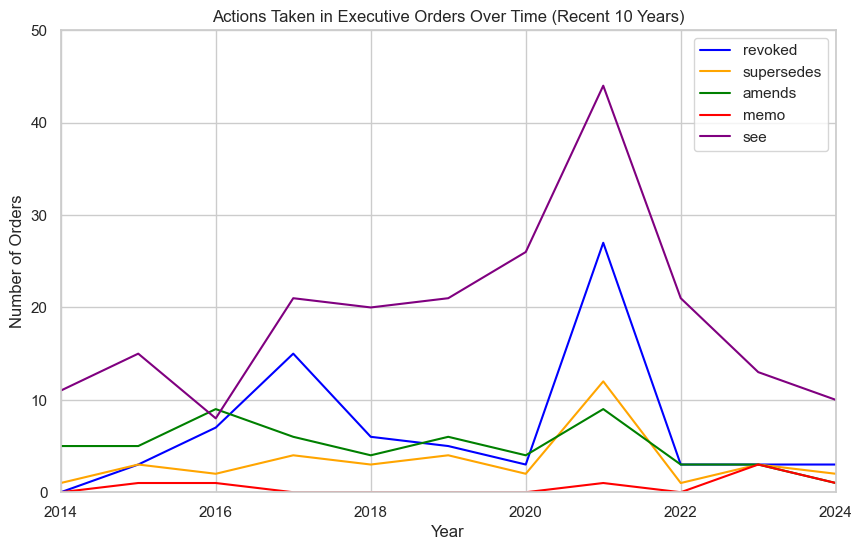

In [ ]:
# Create columns based on keywords in 'disposition_notes'
recent_10_years_data['revoked'] = recent_10_years_data['disposition_notes'].str.contains('Revokes', case=False, na=False).astype(int)
recent_10_years_data['supersedes'] = recent_10_years_data['disposition_notes'].str.contains('Supersedes', case=False, na=False).astype(int)
recent_10_years_data['amends'] = recent_10_years_data['disposition_notes'].str.contains('Amends', case=False, na=False).astype(int)
recent_10_years_data['memo'] = recent_10_years_data['disposition_notes'].str.contains('Memo', case=False, na=False).astype(int)
recent_10_years_data['see'] = recent_10_years_data['disposition_notes'].str.contains('See', case=False, na=False).astype(int)

plt.figure(figsize=(10, 6))

colors = ['blue', 'orange', 'green', 'red', 'purple']

data_resampled = recent_10_years_data.set_index('signing_date').resample('Y')[['revoked', 'supersedes', 'amends', 'memo', 'see']].sum()
data_resampled.plot(color=colors, figsize=(10, 6))

plt.ylim(0, 50)

plt.title("Actions Taken in Executive Orders Over Time (Recent 10 Years)")
plt.ylabel("Number of Orders")
plt.xlabel("Year")
plt.grid(True)

plt.show()

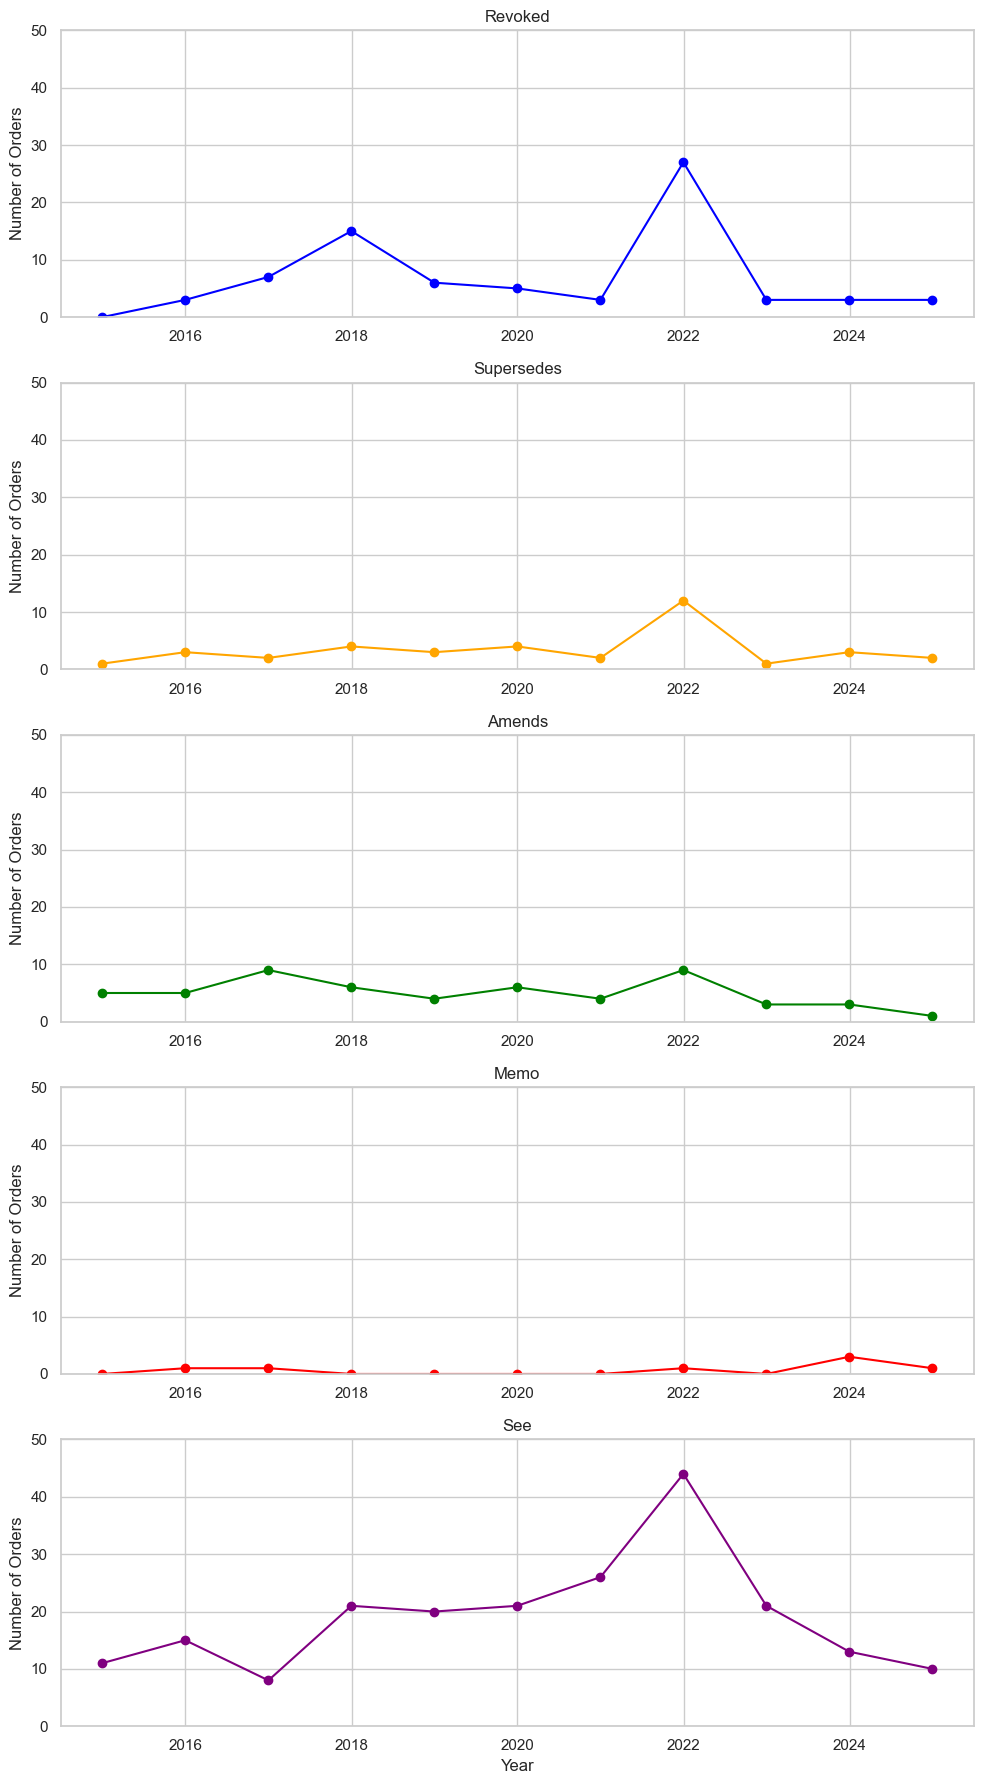

In [286]:
data_with_date = recent_10_years_data[['signing_date', 'revoked', 'supersedes', 'amends', 'memo', 'see']].set_index('signing_date')
data_resampled = data_with_date.resample('Y').sum()

fig, axs = plt.subplots(5, 1, figsize=(10, 18))
actions = ['revoked', 'supersedes', 'amends', 'memo', 'see']
titles = ['Revoked', 'Supersedes', 'Amends', 'Memo', 'See']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, ax in enumerate(axs):
    ax.plot(data_resampled.index, data_resampled[actions[i]], label=titles[i], marker='o', linestyle='-', color=colors[i])
    ax.set_title(titles[i])
    ax.set_ylabel('Number of Orders')
    ax.grid(True)
    ax.set_ylim([0, 50])

axs[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/2817281033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['text_length'] = recent_10_years_data['cleaned_text'].str.len()


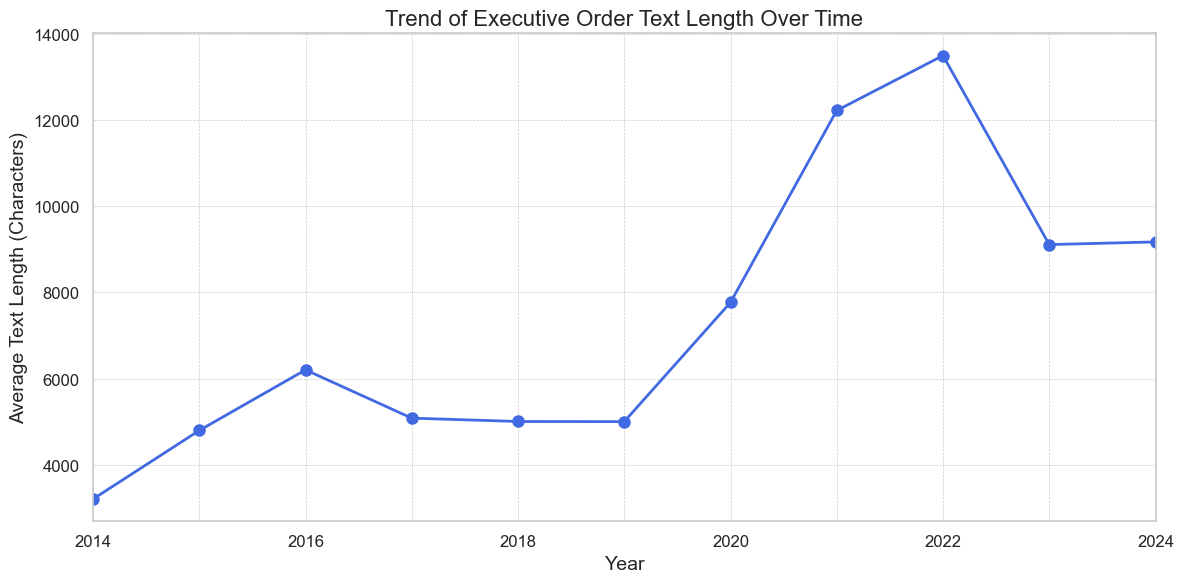

In [287]:
sns.set(style="whitegrid")

recent_10_years_data['text_length'] = recent_10_years_data['cleaned_text'].str.len()
data_cleaned = recent_10_years_data[recent_10_years_data['text_length'] > 0]

plt.figure(figsize=(12, 6))
data_cleaned.set_index('signing_date').resample('Y')['text_length'].mean().plot(
    color='royalblue', linewidth=2, marker='o', markersize=8)

plt.title('Trend of Executive Order Text Length Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Text Length (Characters)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

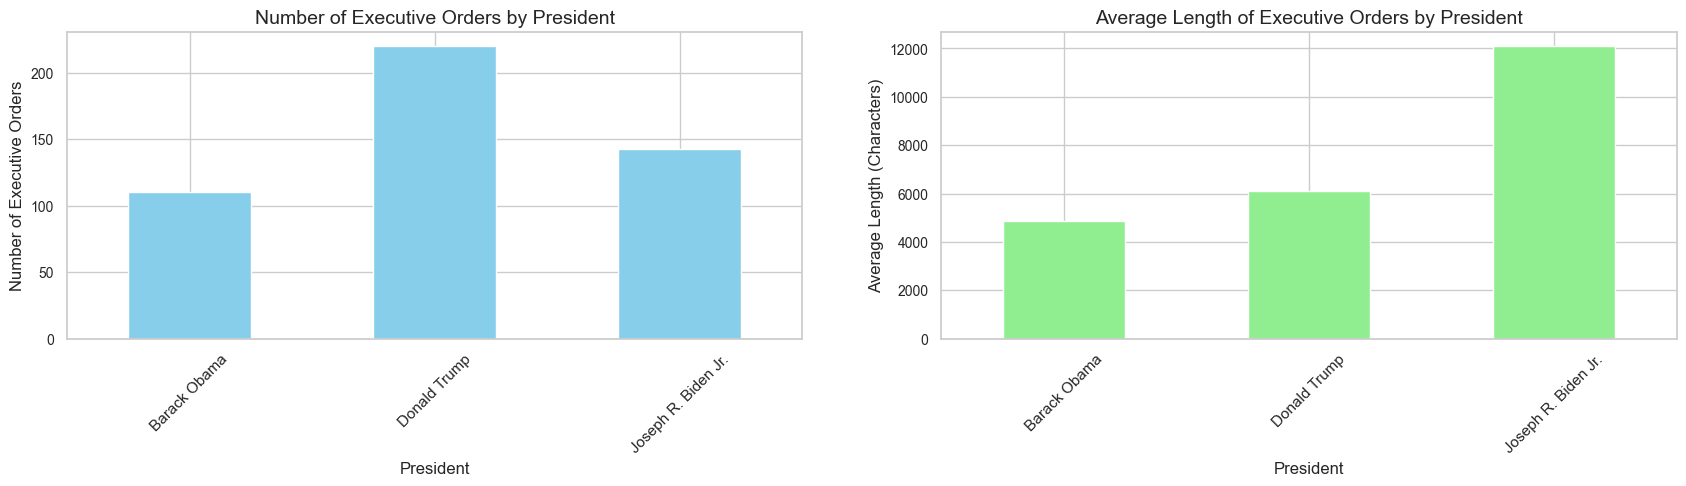

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
order = ['Barack Obama', 'Donald Trump', 'Joseph R. Biden Jr.']

# Number of Executive Orders by President
president_counts = recent_10_years_data['president'].value_counts().reindex(order)
president_counts.plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Number of Executive Orders by President', fontsize=14)
axs[0].set_xlabel('President', fontsize=12)
axs[0].set_ylabel('Number of Executive Orders', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='y', labelsize=10)

# Average Length of Executive Orders by President
average_length = recent_10_years_data.groupby('president')['text_length'].mean().reindex(order)
average_length.plot(kind='bar', color='lightgreen', ax=axs[1])
axs[1].set_title('Average Length of Executive Orders by President', fontsize=14)
axs[1].set_xlabel('President', fontsize=12)
axs[1].set_ylabel('Average Length (Characters)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='y', labelsize=10)

plt.tight_layout(pad=4)
plt.show()

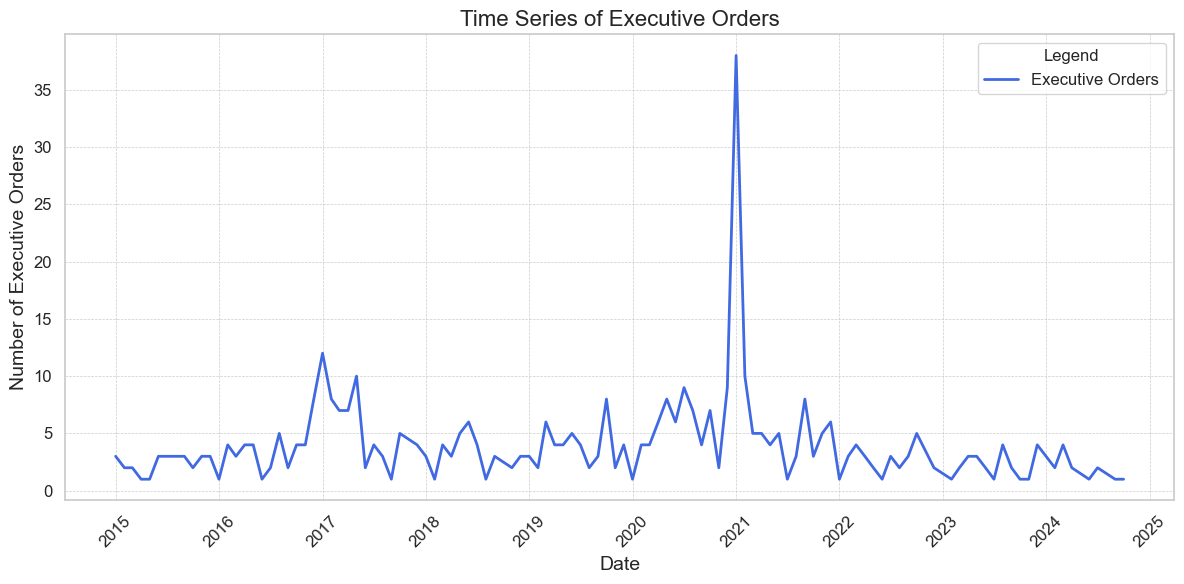

In [289]:
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_series.index.to_timestamp(), time_series, label='Executive Orders', color='royalblue', linewidth=2)
plt.title('Time Series of Executive Orders', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Executive Orders', fontsize=14)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Legend', fontsize=12)

plt.tight_layout()
plt.show()


/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/1588355177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['ai_related'] = recent_10_years_data['cleaned_text'].apply(
/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/1588355177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['year'] = pd.to_datetime(recent_10_years_data['signing_date']).dt.year


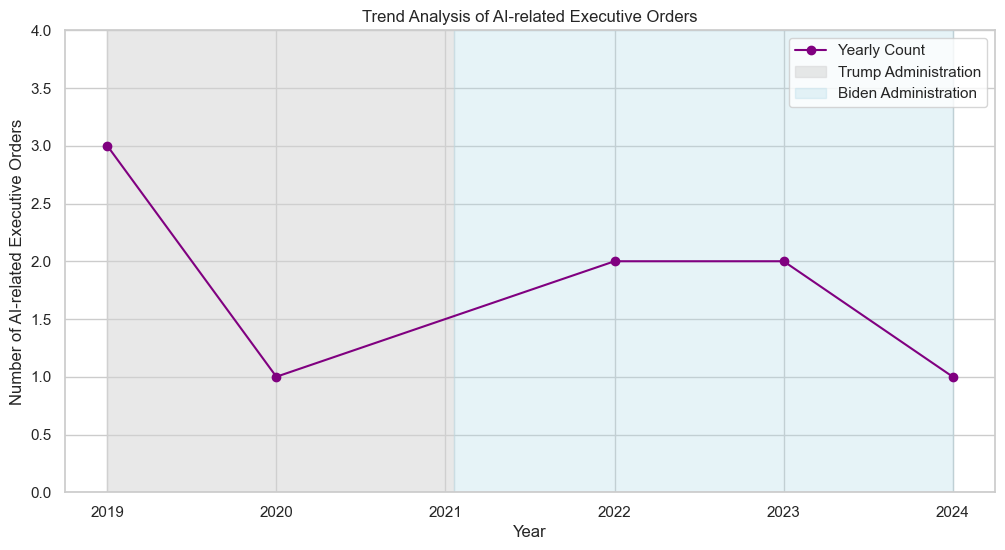

In [290]:
# Step 1: Define AI-related keywords
ai_keywords = ['artificial intelligence', 'AI']

# Step 2: Filter for AI-related executive orders
recent_10_years_data['ai_related'] = recent_10_years_data['cleaned_text'].apply(
    lambda x: any(keyword in str(x).lower() for keyword in ai_keywords)
)

# Step 3: Count AI-related EOs per year
recent_10_years_data['year'] = pd.to_datetime(recent_10_years_data['signing_date']).dt.year
ai_eo_per_year = recent_10_years_data[recent_10_years_data['ai_related']].groupby('year').size()

# Step 4: Plot the enhanced trend of AI-related Executive Orders with highlighted presidencies
plt.figure(figsize=(12, 6))
ai_eo_per_year.plot(kind='line', marker='o', color='purple', label='Yearly Count')

plt.title('Trend Analysis of AI-related Executive Orders')
plt.xlabel('Year')
plt.ylabel('Number of AI-related Executive Orders')
plt.grid(True)
plt.ylim(0, ai_eo_per_year.max() + 1)

plt.axvspan(2019, 2021.05, color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(2021.05, 2024, color='lightblue', alpha=0.3, label='Biden Administration')

plt.legend()
plt.show()

/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_49632/3258799499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data['ai_sentiment'] = recent_10_years_data['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if any(keyword in str(x).lower() for keyword in ai_keywords) else None)


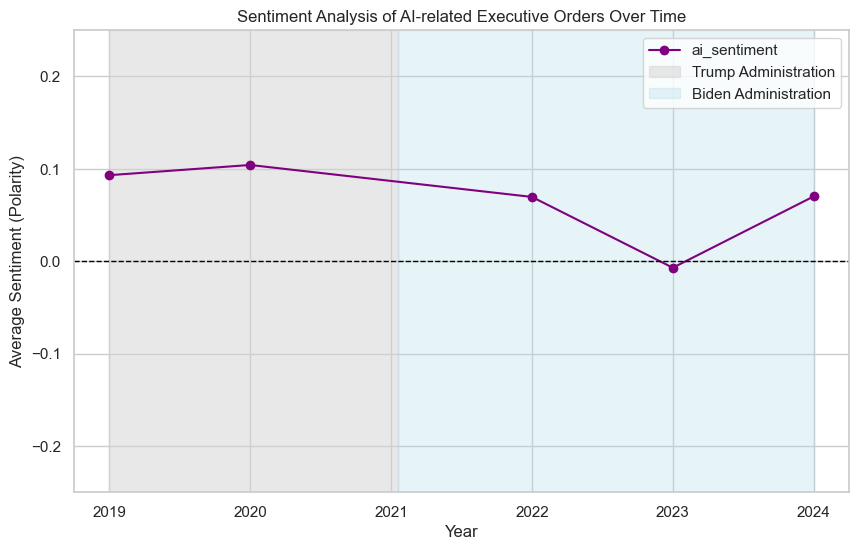

In [291]:
recent_10_years_data['ai_sentiment'] = recent_10_years_data['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if any(keyword in str(x).lower() for keyword in ai_keywords) else None)

# Plotting the sentiment of AI-related Executive Orders over the years
plt.figure(figsize=(10, 6))
ai_sentiment_per_year = recent_10_years_data[recent_10_years_data['ai_sentiment'].notnull()].groupby('year')['ai_sentiment'].mean()

# Create the plot
ax = ai_sentiment_per_year.plot(kind='line', marker='o', color='purple')

# Customize plot appearance
plt.title('Sentiment Analysis of AI-related Executive Orders Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment (Polarity)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Highlighting different presidencies
plt.axvspan(2019, 2021.05, color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(2021.05, 2024, color='lightblue', alpha=0.3, label='Biden Administration')

# Set the y-axis limits between -0.25 and 0.25 for a focused view
ax.set_ylim(-0.25, 0.25)

plt.legend()
plt.show()

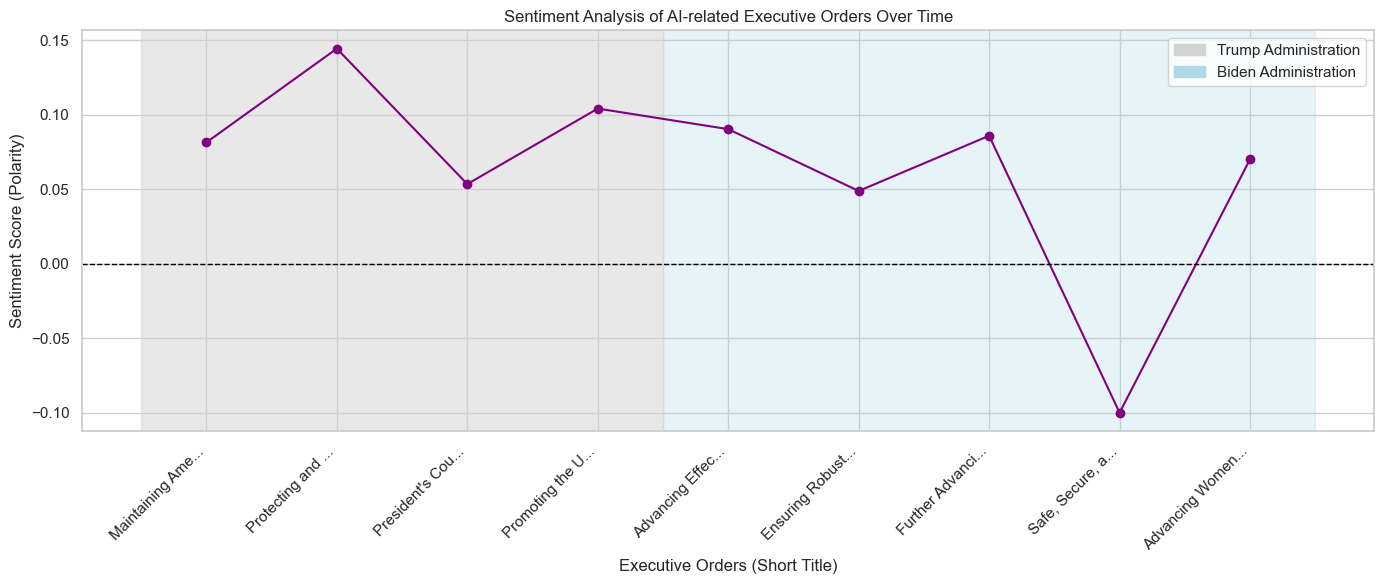

In [292]:
ai_related_eos = recent_10_years_data[recent_10_years_data['ai_related'] & recent_10_years_data['ai_sentiment'].notnull()]
ai_related_eos_sorted = ai_related_eos.sort_values(by='signing_date')

ai_related_eos_sorted['signing_date'] = pd.to_datetime(ai_related_eos_sorted['signing_date'])

ai_related_eos_sorted['president'] = ai_related_eos_sorted['signing_date'].apply(
    lambda date: 'Trump' if date < pd.to_datetime('2021-01-20') else 'Biden'
)

ai_related_eos_sorted['short_title'] = ai_related_eos_sorted['title'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)

# Plotting each EO in chronological order with titles on the x-axis
plt.figure(figsize=(14, 6))

plt.axvspan(-0.5, len(ai_related_eos_sorted[ai_related_eos_sorted['president'] == 'Trump']) - 0.5, 
            color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(len(ai_related_eos_sorted[ai_related_eos_sorted['president'] == 'Trump']) - 0.5, 
            len(ai_related_eos_sorted) - 0.5, 
            color='lightblue', alpha=0.3, label='Biden Administration')

# Plotting the sentiment scores
plt.plot(ai_related_eos_sorted['short_title'], ai_related_eos_sorted['ai_sentiment'], marker='o', color='purple', linestyle='-')

plt.title('Sentiment Analysis of AI-related Executive Orders Over Time')
plt.xlabel('Executive Orders (Short Title)')
plt.ylabel('Sentiment Score (Polarity)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Draw baseline at y=0
plt.xticks(rotation=45, ha='right')

trump_patch = mpatches.Patch(color='lightgrey', label='Trump Administration')
biden_patch = mpatches.Patch(color='lightblue', label='Biden Administration')
plt.legend(handles=[trump_patch, biden_patch])

# Show the plot
plt.tight_layout()
plt.show()

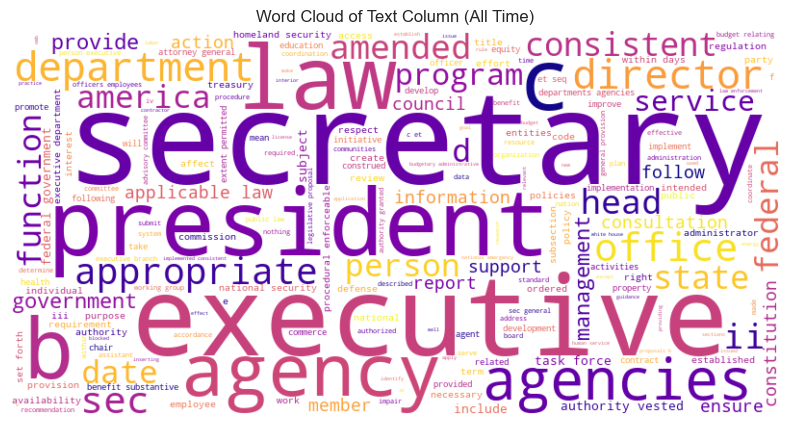

In [293]:
# List of additional stopwords, including both plural and singular, and variants
additional_stopwords = {
    "united states", "united state", "order", "executive order", "hereby", "section", 
    "act", "pursuant", "whereas", "thereof", "shall", "said", "s", "u", 
    "including", "use", "also", "may", "every", "either", "much", "must", 
    "need", "now", "often", "part", "put", "united", "states"
}

stopwords = set(STOPWORDS)
stopwords.update(additional_stopwords)

text_data = ' '.join(data['cleaned_text'].dropna()).lower()

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='plasma', 
    stopwords=stopwords
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Column (All Time)')
plt.show()

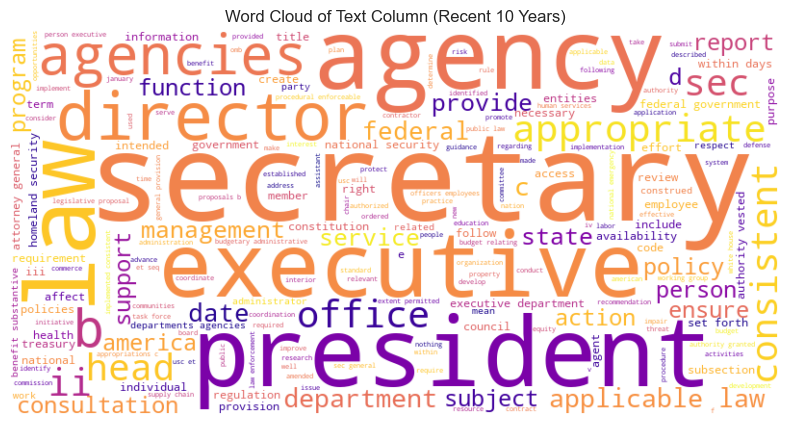

In [294]:
text_data = ' '.join(recent_10_years_data['cleaned_text'].dropna()).lower()

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='plasma', 
    stopwords=stopwords
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Column (Recent 10 Years)')
plt.show()